## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [1]:
1+1

2

In [2]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 65kB/s 
     |████████████████████████████████| 3.8MB 57.0MB/s 
     |████████████████████████████████| 450kB 60.3MB/s 
     |████████████████████████████████| 81kB 14.5MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
import tensorflow as tf


In [37]:
tf.__version__

'2.0.0'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker' , 'Bag','Ankle boot']

###4. Find no.of samples in training and test dataset

In [45]:
x_train.shape

(60000, 28, 28)

In [46]:
y_train.shape

(60000,)

In [47]:
x_test.shape

(10000, 28, 28)

In [48]:
y_test.shape

(10000,)

###5. Find dimensions of an image in the dataset

In [49]:
x_train[0].shape

(28, 28)

### 6. Verify if existing labels/Classes are correct 

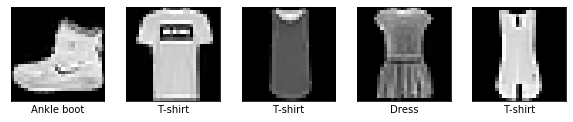

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [52]:
y_train[0:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train= x_train/255
x_test= x_test/255

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
x_test1= tf.keras.backend.expand_dims(
    x_test,
    axis=-1
)

In [0]:
x_train1=tf.keras.backend.expand_dims(
    x_train,
    axis=-1
)

In [56]:
x_train1.shape

TensorShape([60000, 28, 28, 1])

In [57]:
x_test1.shape

TensorShape([10000, 28, 28, 1])

###10. Import the necessary layers from keras to build the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))t

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
x_train.dtype

dtype('float64')

In [23]:
x_train1.dtype

tf.float64

In [24]:
#Train the model
model.fit(x_train1,tf.convert_to_tensor(y_train),          
          validation_data=(x_test1, tf.convert_to_tensor(y_test)),
          epochs=10,
          batch_size=132)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.3877 - accuracy: 0.8608 - val_loss: 0.2993 - val_accuracy: 0.8911
Epoch 2/10
60000/60000 [==============================] - 185s 3ms/sample - loss: 0.2307 - accuracy: 0.9162 - val_loss: 0.2591 - val_accuracy: 0.9049
Epoch 3/10
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.1635 - accuracy: 0.9397 - val_loss: 0.2514 - val_accuracy: 0.9128
Epoch 4/10
60000/60000 [==============================] - 174s 3ms/sample - loss: 0.1095 - accuracy: 0.9599 - val_loss: 0.2843 - val_accuracy: 0.9051
Epoch 5/10
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0738 - accuracy: 0.9726 - val_loss: 0.2983 - val_accuracy: 0.9110
Epoch 6/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0487 - accuracy: 0.9826 - val_loss: 0.3502 - val_accuracy: 0.9158
Epoch 7/10
60000/60000 [==========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#clear the session
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model2 = tf.keras.models.Sequential()

#normalize data
model2.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add  dropout layer
model2.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
model2.add(tf.keras.layers.Flatten())

#Dense layer
model2.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])



In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
#Train the model
model2.fit(x_train1,tf.convert_to_tensor(y_train),          
          validation_data=(x_test1, tf.convert_to_tensor(y_test)),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 150s 2ms/sample - loss: 0.3568 - accuracy: 0.8717 - val_loss: 0.2705 - val_accuracy: 0.9013
Epoch 2/10
60000/60000 [==============================] - 149s 2ms/sample - loss: 0.2280 - accuracy: 0.9171 - val_loss: 0.2483 - val_accuracy: 0.9084
Epoch 3/10
60000/60000 [==============================] - 152s 3ms/sample - loss: 0.1800 - accuracy: 0.9322 - val_loss: 0.2311 - val_accuracy: 0.9168
Epoch 4/10
60000/60000 [==============================] - 149s 2ms/sample - loss: 0.1445 - accuracy: 0.9452 - val_loss: 0.2201 - val_accuracy: 0.9256
Epoch 5/10
60000/60000 [==============================] - 147s 2ms/sample - loss: 0.1161 - accuracy: 0.9567 - val_loss: 0.2480 - val_accuracy: 0.9225
Epoch 6/10
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.0971 - accuracy: 0.9640 - val_loss: 0.2769 - val_accuracy: 0.9188
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

val_accuracy: 92.42%

In [61]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1

####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(x_train1)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen=ImageDataGenerator(width_shift_range=0.2, horizontal_flip=True, vertical_flip= True, rotation_range=5)
datagen.fit(x_train1)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

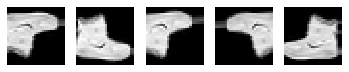

In [35]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train1[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()